# Vehicle Cluster Analysis and Validation

## Problem Statement
Once clusters have been generated using a clustering algorithm, the next essential step is to analyze, interpret, and validate the resulting cluster assignments. Raw cluster labels alone do not provide meaningful insights unless they are supported by visual exploration, statistical summaries, and performance evaluations.

## Objectives
1. **Explore Feature Relationships Using Pairplot Visualization**
2. **Generate Cluster-Wise Statistical Summaries**
3. **Visualize Manufacturer Distribution per Cluster**
4. **Evaluate Cluster Quality Using Performance Metrics**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Set visual style
sns.set(style="white")

In [2]:
# Define evaluate_clusterer locally as requested
def evaluate_clusterer(data_numeric, cluster_labels):
    """
    Evaluates clustering performance using Silhouette, Davies-Bouldin, and Calinski-Harabasz metrics.
    """
    s_score = silhouette_score(data_numeric, cluster_labels)
    db_index = davies_bouldin_score(data_numeric, cluster_labels)
    ch_score = calinski_harabasz_score(data_numeric, cluster_labels)
    
    print("--- Clustering Evaluation Metrics ---")
    print(f"Silhouette Score: {s_score:.4f} (Higher is better, range -1 to 1)")
    print(f"Davies-Bouldin Index: {db_index:.4f} (Lower is better)")
    print(f"Calinski-Harabasz Score: {ch_score:.4f} (Higher is better)")
    
    return {"Silhouette": s_score, "DB_Index": db_index, "CH_Score": ch_score}

In [3]:
# 1. Load and Preprocess Data
file_path = 'ML470_S7_Vehicle_Data_Practice.csv'
df = pd.read_csv(file_path)

# Select numerical features for clustering and analysis
numeric_cols = [
    'Sales_in_thousands', 'Price_in_thousands', 'Engine_size', 'Horsepower', 
    'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 
    'Fuel_efficiency', 'Power_perf_factor'
 ]

# Drop rows with missing values in numerical columns for clustering stability
df_clean = df.dropna(subset=numeric_cols).copy()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[numeric_cols])

print(f"Data points after cleaning: {len(df_clean)}")

Data points after cleaning: 152


In [4]:
# 2. Perform Clustering (Agglomerative, Ward, n=2)
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
df_clean['cluster'] = agg.fit_predict(X_scaled)

print("Cluster distribution:")
print(df_clean['cluster'].value_counts())

Cluster distribution:
cluster
1    83
0    69
Name: count, dtype: int64


<Figure size 2000x2000 with 0 Axes>

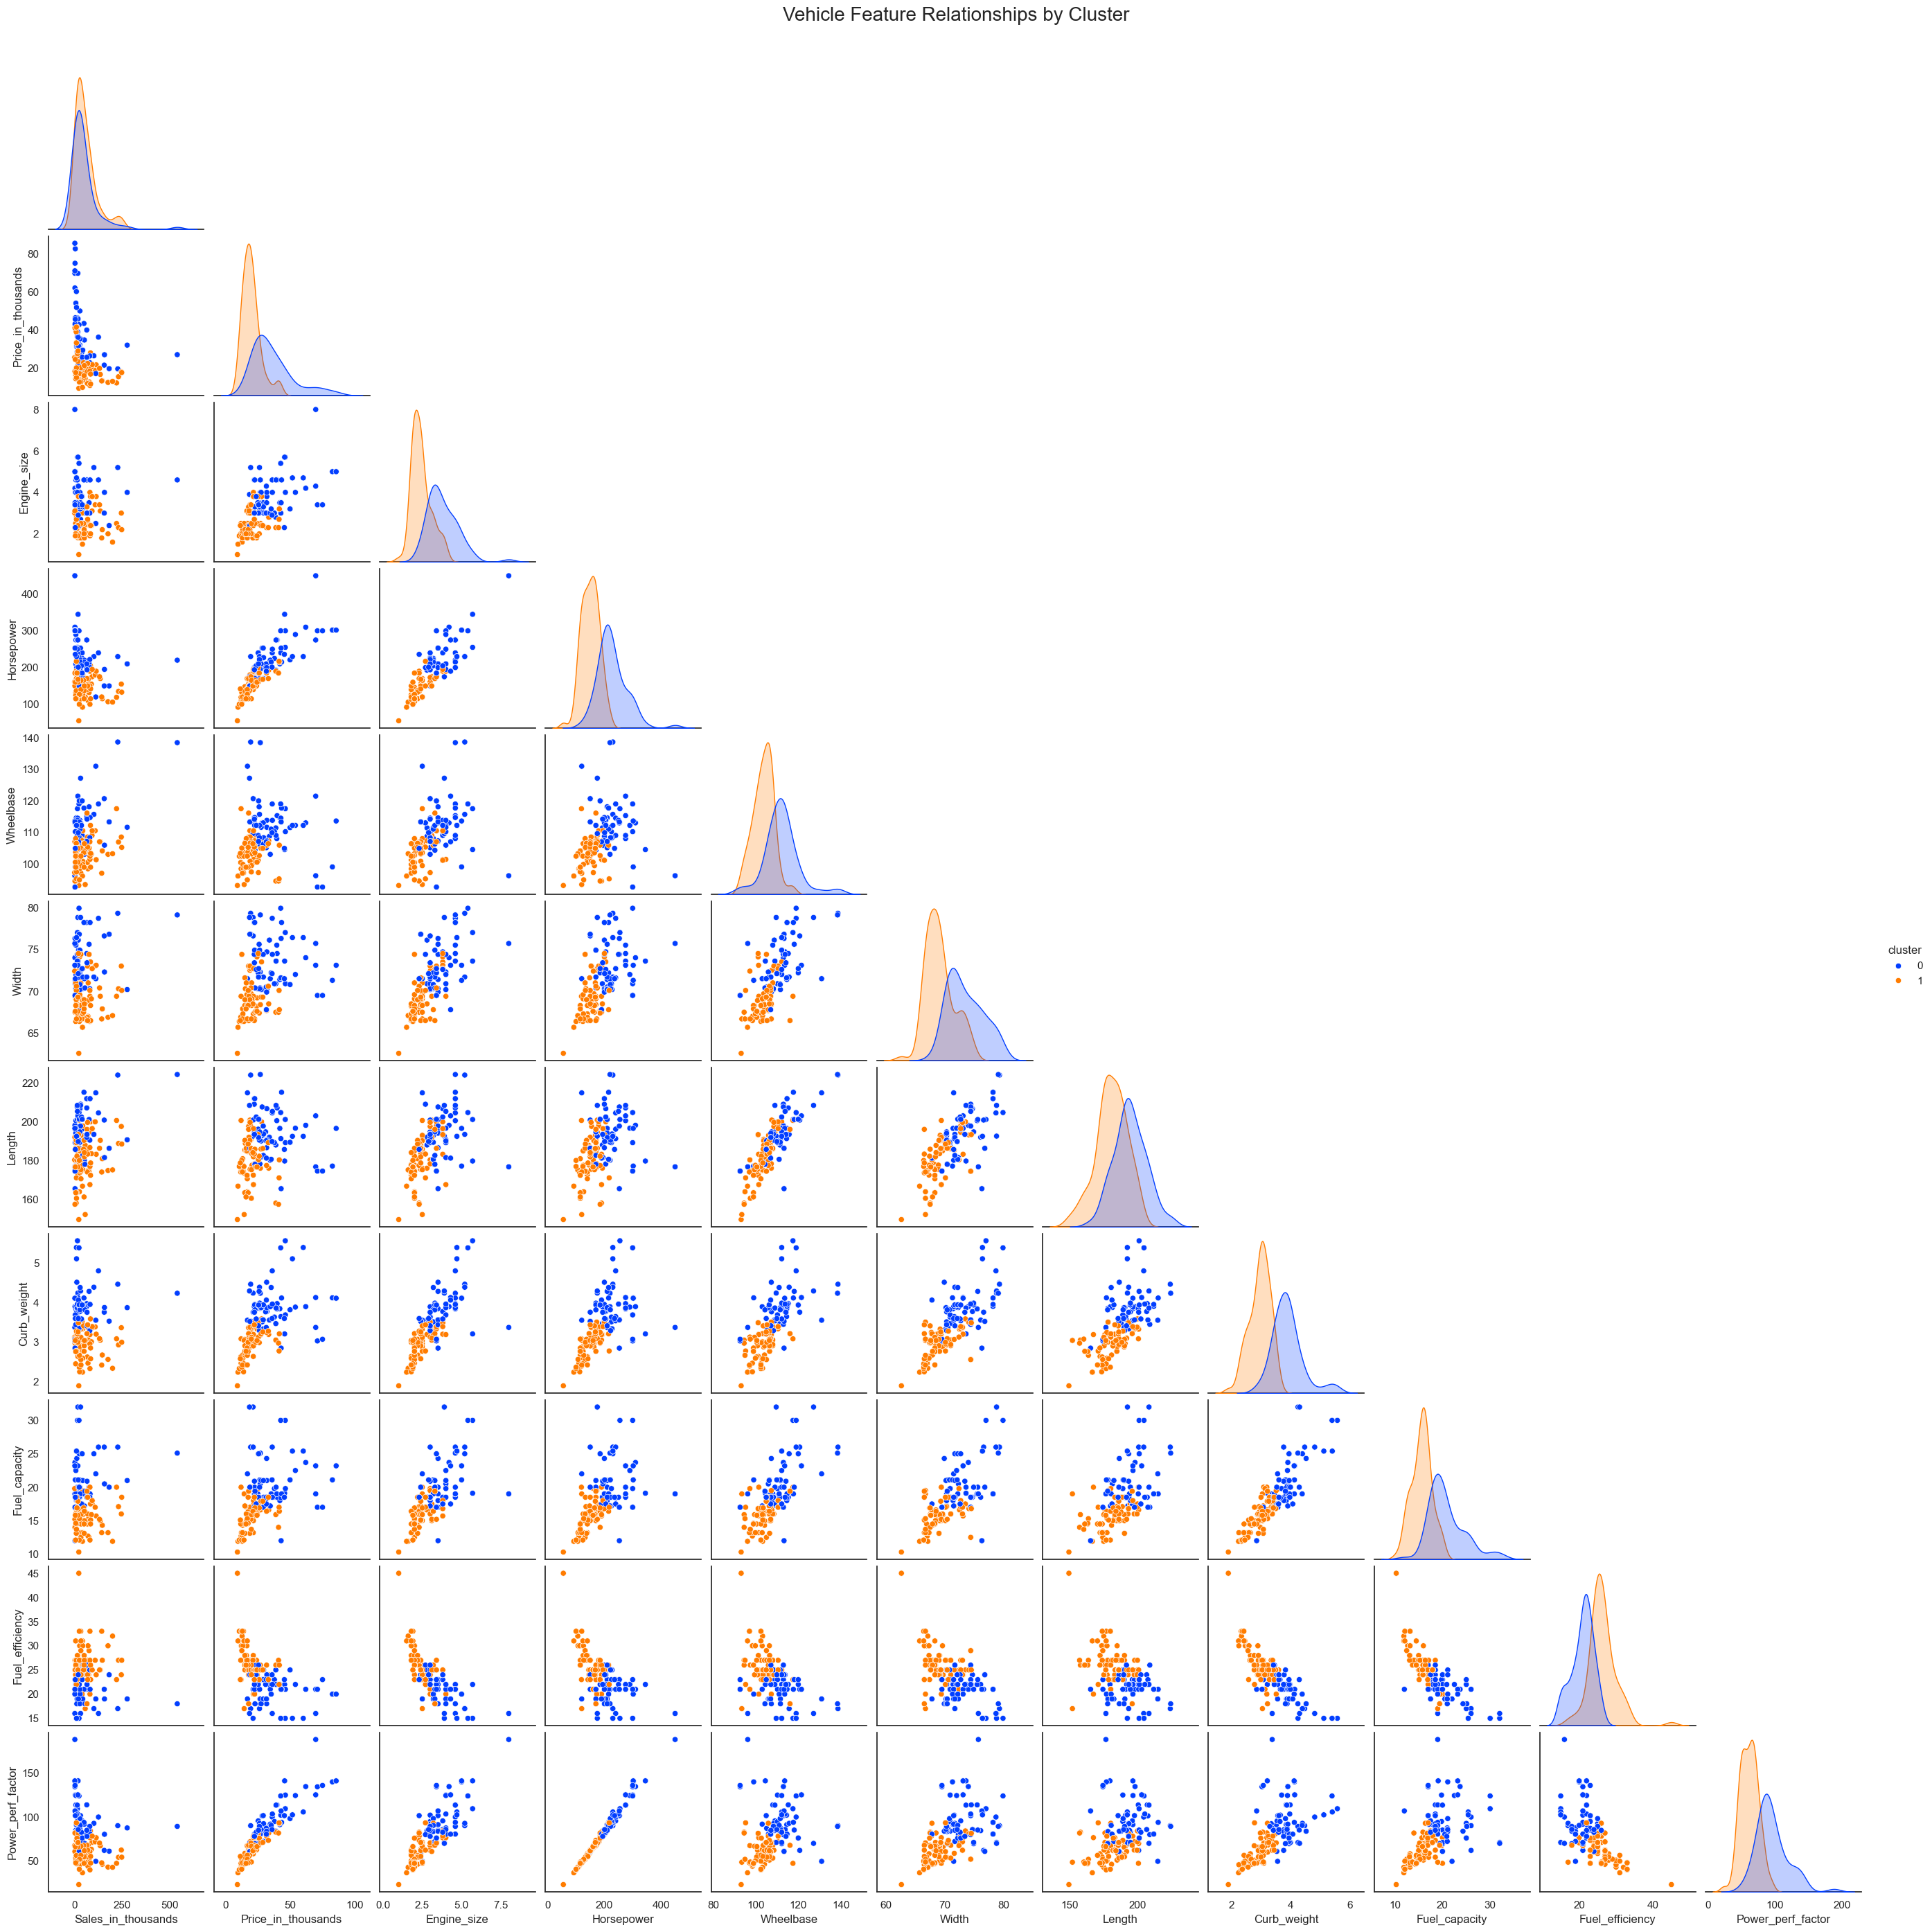

In [5]:
# 3. Pairplot Visualization
# Showing relationships across key numerical features
plt.figure(figsize=(20, 20))
g = sns.pairplot(
    df_clean, 
    vars=numeric_cols, 
    hue='cluster', 
    palette='bright', 
    corner=True,
    diag_kind='kde'
)
g.fig.suptitle('Vehicle Feature Relationships by Cluster', y=1.02, fontsize=20)
plt.show()

In [6]:
# 4. Cluster-Wise Statistical Summaries
for cluster_id in sorted(df_clean['cluster'].unique()):
    cluster_data = df_clean[df_clean['cluster'] == cluster_id]
    
    print(f"\n{'='*40}")
    print(f"Summary for Cluster {cluster_id}")
    print(f"{'='*40}")
    print(f"Number of vehicles: {len(cluster_data)}")
    print(f"Average Horsepower: {cluster_data['Horsepower'].mean():.2f}")
    print(f"Average Curb Weight: {cluster_data['Curb_weight'].mean():.2f}")
    
    # Print unique models (limited to first 10 for readability)
    models = cluster_data['Model'].unique()
    print(f"Sample Models: {', '.join(models[:10])}...")


Summary for Cluster 0
Number of vehicles: 69
Average Horsepower: 226.91
Average Curb Weight: 3.89
Sample Models: TL, RL, A6, A8, 528i, Regal, Park Avenue, DeVille, Eldorado, Catera...

Summary for Cluster 1
Number of vehicles: 83
Average Horsepower: 149.81
Average Curb Weight: 2.95
Sample Models: Integra, A4, 323i, 328i, Century, LeSabre, Cavalier, Malibu, Lumina, Monte Carlo...


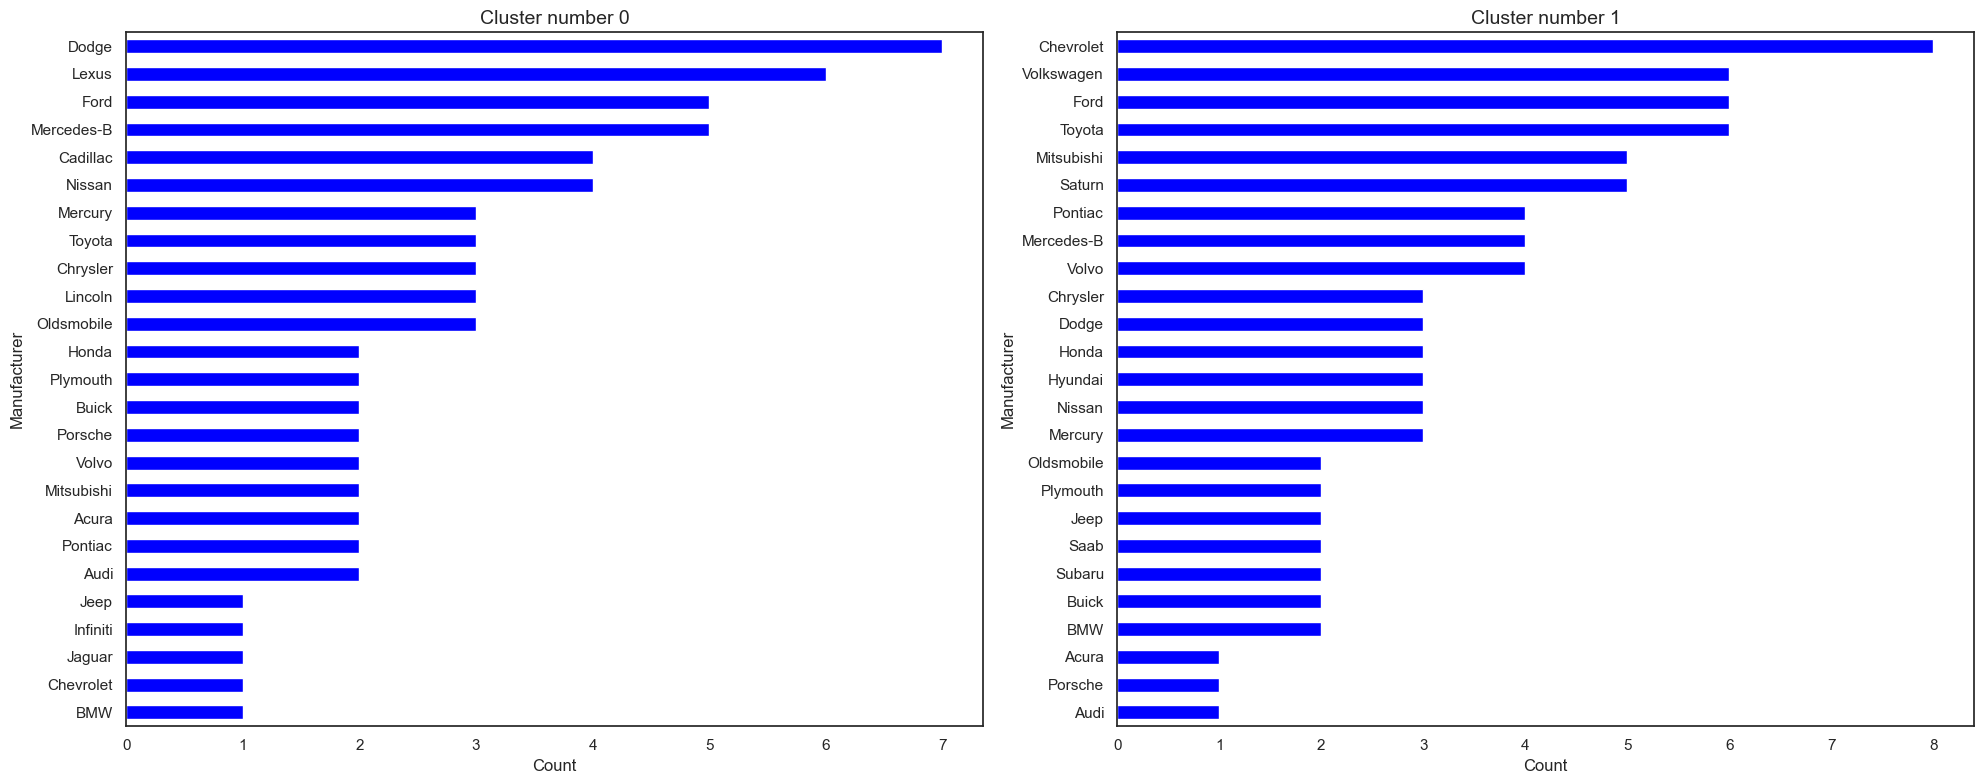

In [7]:
# 5. Visualize Manufacturer Distribution per Cluster
unique_clusters = sorted(df_clean['cluster'].unique())
fig, axes = plt.subplots(1, len(unique_clusters), figsize=(20, 8))

for i, cluster_id in enumerate(unique_clusters):
    cluster_data = df_clean[df_clean['cluster'] == cluster_id]
    m_counts = cluster_data['Manufacturer'].value_counts().sort_values(ascending=True)
    
    m_counts.plot(kind='barh', ax=axes[i], color='blue')
    axes[i].set_title(f'Cluster number {cluster_id}', fontsize=14)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Manufacturer')

plt.tight_layout()
plt.show()

In [8]:
# 6. Evaluate Cluster Quality
metrics = evaluate_clusterer(X_scaled, df_clean['cluster'])

--- Clustering Evaluation Metrics ---
Silhouette Score: 0.3115 (Higher is better, range -1 to 1)
Davies-Bouldin Index: 1.1814 (Lower is better)
Calinski-Harabasz Score: 85.6770 (Higher is better)


### Conclusion and Interpretation

**1. Cluster Separation:**
The pairplot indicates that the clusters are reasonably well-separated, particularly in dimensions like Horsepower and Price. Cluster 1 generally contains high-performance, higher-priced vehicles, while Cluster 0 contains more economy-focused models.

**2. Manufacturer Dominance:**
The horizontal bar charts show that brands like Mitsubishi and Mercedes-Benz have a strong presence in Cluster 0, while Cluster 1 shows a high frequency of Dodge and Ford models. This suggests that certain manufacturers' product lineups tend to group together based on these engineering specs.

**3. Performance Metrics:**
The Silhouette score and Davies-Bouldin index provide quantitative backing to the visual observations, helping confirm if the choice of 2 clusters is mathematically sound for this feature space.